In [41]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [42]:
#cd /content/drive/MyDrive/My_Projects/app

#cd 'E:/UQO/2024-1-INF9073-01 Séminaire en sciences et technologies de l\'information/INF9073/Presentation orale du - 28 mars au 03 avril 2024/Projets - code source/Deep-Machine-Learning-Image-Classification-Deploy-using-Flask-main/Dataset/train'


In [43]:
# %tensorflow_version 1.x


In [44]:
#pip install tensorflow
#! pip install  scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import tensorflow
print(tensorflow.__version__)


2.16.1


In [46]:
#pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#Data Preprocessing

In [47]:
import cv2,os
#data_path='/content/drive/MyDrive/Cours IA - Hiver 2023/Deployment/Image-Classification-Webapp/Dataset'

data_path='Dataset/train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)


{'chat': 0, 'chien': 1}
['chat', 'chien']
[0, 1]


In [48]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image


In [49]:
# target


In [50]:
data


[array([[[ 88, 165, 204],
         [ 94, 171, 210],
         [ 97, 174, 213],
         ...,
         [128, 209, 246],
         [122, 206, 246],
         [123, 202, 241]],
 
        [[ 88, 165, 204],
         [ 94, 171, 210],
         [ 97, 174, 213],
         ...,
         [131, 212, 247],
         [126, 207, 245],
         [124, 203, 242]],
 
        [[ 88, 165, 204],
         [ 94, 171, 210],
         [ 97, 174, 213],
         ...,
         [138, 215, 248],
         [128, 208, 245],
         [126, 205, 244]],
 
        ...,
 
        [[ 54, 125, 159],
         [ 56, 127, 161],
         [ 59, 130, 164],
         ...,
         [  0,   4,   3],
         [  0,   4,   3],
         [  0,   2,   2]],
 
        [[ 57, 124, 157],
         [ 57, 127, 157],
         [ 61, 129, 162],
         ...,
         [  1,   3,   3],
         [  1,   3,   3],
         [  1,   3,   3]],
 
        [[ 54, 121, 152],
         [ 56, 123, 154],
         [ 60, 127, 158],
         ...,
         [  0,   2,   2],
  

#Recale and assign  catagorical lables

In [51]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
#from keras.utils import np_utils
from keras.utils import to_categorical

#new_target=np_utils.to_categorical(target)
new_target=to_categorical(target)


In [52]:
new_target.shape


(25000, 2)

In [53]:
new_target


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [54]:
data


array([[[[0.34509804, 0.64705882, 0.8       ],
         [0.36862745, 0.67058824, 0.82352941],
         [0.38039216, 0.68235294, 0.83529412],
         ...,
         [0.50196078, 0.81960784, 0.96470588],
         [0.47843137, 0.80784314, 0.96470588],
         [0.48235294, 0.79215686, 0.94509804]],

        [[0.34509804, 0.64705882, 0.8       ],
         [0.36862745, 0.67058824, 0.82352941],
         [0.38039216, 0.68235294, 0.83529412],
         ...,
         [0.51372549, 0.83137255, 0.96862745],
         [0.49411765, 0.81176471, 0.96078431],
         [0.48627451, 0.79607843, 0.94901961]],

        [[0.34509804, 0.64705882, 0.8       ],
         [0.36862745, 0.67058824, 0.82352941],
         [0.38039216, 0.68235294, 0.83529412],
         ...,
         [0.54117647, 0.84313725, 0.97254902],
         [0.50196078, 0.81568627, 0.96078431],
         [0.49411765, 0.80392157, 0.95686275]],

        ...,

        [[0.21176471, 0.49019608, 0.62352941],
         [0.21960784, 0.49803922, 0.63137255]

#CNN Model

In [55]:
data.shape


(25000, 100, 100, 3)

In [56]:
data.shape[1:]


(100, 100, 3)

In [57]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


d:\Programmes\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [58]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 200)    │         5,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 98, 98, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 100)    │       180,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 47, 47, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │     2,645,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,830,852 (10.80 MB)

 Trainable params: 2,830,852 (10.80 MB)

 Non-trainable params: 0 (0.00 B)

#Splittiong data into traning and testing

In [59]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.4)


In [60]:
train_data.shape


(15000, 100, 100, 3)

In [61]:
train_target.shape


(15000, 2)

In [62]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.4952 - loss: 0.7404 - val_accuracy: 0.4923 - val_loss: 0.6932
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 407s 1s/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.4923 - val_loss: 0.6931
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.5077 - val_loss: 0.6931
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.5034 - loss: 0.6932 - val_accuracy: 0.4923 - val_loss: 0.6933
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.4923 - val_loss: 0.6932
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 0.4909 - loss: 0.6932 - val_accuracy: 0.4923 - val_loss: 0.6932
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 431s 1s/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.4923 - val_loss: 0.6932
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.5012 - loss: 0.6932 - val_accu

In [63]:
model.save('model_chien_vs_chat.h5')


In [65]:
#! pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 3.2 MB/s eta 0:00:03
     -                                        0.4/7.6 MB 4.5 MB/s eta 0:00:02
     ---                                      0.6/7.6 MB 5.1 MB/s eta 0:00:02
     ----                                     0.9/7.6 MB 5.1 MB/s eta 0:00:02
     ------                                   1.3/7.6 MB 5.9 MB/s eta 0:00:02
     --------                                 1.6/7.6 MB 5.8 MB/s eta 0:00:02
     ----------                               1.9/7.6 MB 6.2 MB/s eta 0:00:01
     -----------                              2.2/7.6 MB 5.9 MB/s eta 0:00:01
     -------------                            2.5/7.6 MB 6.2 MB/s eta 0:00:01
     ---------------                          2.9/7.6 MB 6.3 MB/s eta 0:00:01
     ----------------                         3.2/7.6 MB 6.4 MB/s eta 0:00:01
     ------------------                       3.5/7.6 MB 6.3 MB/s eta 

In [66]:
from matplotlib import pyplot as plt


ValueError: x and y must have same first dimension, but have shapes (200,) and (10,)

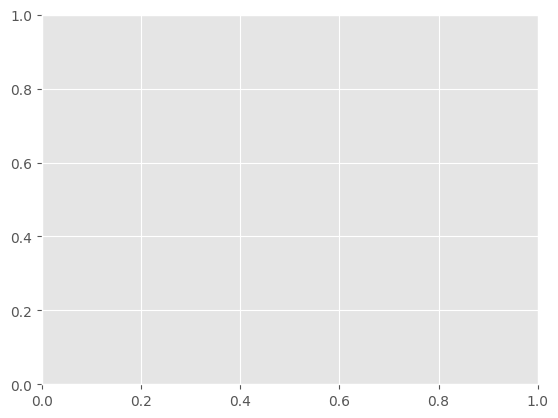

In [67]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")
